In [ ]:
import random
import csv
import copy
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
class score():
  #score(학년,반수)로 새 클래스 작성
  def __init__(self,학년,반수):
    self.str_grade="{}학년".format(학년)
    self.grade = [self.str_grade]
    for i in range(1,반수+1): #0부터 시작하는거 보정
      x="{}학년 {}반".format(학년,i)
      self.grade.append([x])
    self.A=90
    self.B=80
    self.C=70
    self.results=[]
  
  def 학년성적입력(self,학년성적목록):
    try:
      self.grade=학년성적목록
    except ValueError:
      print("지정된 형태의 데이터가 아닙니다.")

  #성적 입력/수정함수
  #성적목록은 ["i학년 j반", ["1번",{"국어":70,"수학":60,"영어":80,"과학":40}], ...., ["k번",{"국어":50,"수학":30,"영어":60,"과학":50}]] 꼴로 가정
  #수정 성적 목록은 ["i학년 j반", [{"학생정보":i학년j반k번","국어":70,"수학":60,"영어":80,"과학":40}], ...., [{"학생정보":i학년j반k번","국어":50,"수학":30,"영어":60,"과학":50}]]로 가정
  def 반별성적입력(self,반번호,반성적목록):
    try:
      self.grade[반번호]=반성적목록
    except ValueError:
      print("지정된 형태의 데이터가 아닙니다.")


  #성적은 {"국어":70,"수학":60,"영어":80,"과학":40}꼴로 가정
  def 학생별성적입력(self,반번호,학생번호,성적):
    try:
      sl={"학생정보":"{}{}반{}번".format(self.str_grade,반번호,학생번호)}
      sl.update(성적)
      self.grade[반번호].insert(학생번호,sl)
    except ValueError:
      print("지정된 형태의 데이터가 아닙니다.")

  def csv저장(self):
    try:
      f = open("{}.csv".format(self.grade[0]), mode = 'w', encoding = 'utf-8-sig')
      w = csv.writer(f)
      t= self.grade
      #학년에서 가장 학생이 많은 반을 찾아서 그거 기준으로 태그 입력
      max_student=0
      for j in range(1,len(t)):
        if len(t[j]) > max_student:
          max_student=len(t[j])
      tags=["구분"]
      for n in range(1,max_student):
        tags.append("{}번".format(n))
      print(tags) #tag정상 생성 확인용
      w.writerow(tags)
      for j in range(1,len(t)):
        w.writerow(t[j])
      print("{}.csv파일에 저장하였습니다.".format(self.grade[0]))
    except:
      print("{}.csv파일에 저장하지 못했습니다.".format(self.grade[0]))


  def csv열기(self,fn): #문제점 발견, 학생의 자료를 저장하고 불러올때 [str,{}]꼴이 유지된게 아니라 통째 str로 인식 ->해동함수로 해결
    slist=[]
    f=open("{}.csv".format(fn),mode='r',encoding='utf-8-sig')
    w=csv.reader(f)
    slist.extend(w)
    slist[0]=fn
    self.grade=slist
    for j in range(1,len(self.grade)): #j반
      t=self.grade[j]
      for k in range(1,len(t)): #k번
        t[k]=self.해동(t[k])
    print(self.grade)
    print("{}.csv파일을 여는데 성공했습니다.".format(fn))

  #{"학생정보":'6학년1반1번','국어': 42, '영어': 34, '수학': 53, '과학': 87}모양의 string을 원래대로 리스트와 딕셔너리로 변환하는 새로운 함수 필요
  #위 역할을 하는 해동함수만들어 보완
  def 해동(self,학생데이터):
    temp_list=학생데이터.split(',')
    for i in range(len(temp_list)):
      temp_list[i]=temp_list[i].replace("{","").replace("}","").replace("'","").replace(" ","") #연속작업을 이렇게도 처리 가능
    D={}
    for X in temp_list:
      if ':' in X:
        T=X.split(':')
        #print(T) #정상작동 확인용
        D[T[0]]=T[1]
    D['국어']=int(D['국어'])
    D['영어']=int(D['영어'])
    D['수학']=int(D['수학'])
    D['과학']=int(D['과학'])
    return D
  

In [ ]:
class score_analysis(score):
  def __init__(self):
    #self.grade=[] #학년별 성적이 들어있는 데이터, score를 상속받아서 따로 선언해줄필요 없음
    self.results=[]
    #점수 기준 설정
    self.A=90
    self.B=80
    self.C=70
    #self.D=60 D기준은 없어도 될듯, A기준이상 A, B기준 이상 B, C기준 이상 C, 그 미만 D

  #csv열기 메소드 오버라이딩이 이상하게 안됨 그래서 아래 함수 따로 만들어서 실행시켜줘야 results리스트가 제대로 생성됨
  def 성적처리시작(self):
    self.results=copy.deepcopy(self.grade)
    self.results[0]={"학년":self.results[0]}
    for j in range(1,len(self.results)):
     self.results[j][0]={"반":self.results[j][0]}
    print("성적처리 준비가 완료되었습니다.")

  #하나로 합칠수 있을거 같긴한데 아래보다 길어질거 같음
  def A기준바꾸기(self,n):
    self.A=n
  def B기준바꾸기(self,n):
    self.B=n
  def C기준바꾸기(self,n):
    self.C=n

  def 등급판정(self,점수):
    if 점수 >= self.A:
      return 'A'
    elif 점수 >= self.B:
      return 'B'
    elif 점수 >= self.C:
      return 'C'
    elif 점수 < self.C:
      return 'D'
    else:
      print("잘못된 값입니다.")
      return 'err'

  def 등급부여(self):
    for j in range(1,len(self.grade)):
      t=self.grade[j] #j반
      for k in range(1,len(t)):
        tt=t[k]    
        self.results[j][k].update({"국어":self.등급판정(int(tt["국어"])),"영어":self.등급판정(int(tt["영어"])),"수학":self.등급판정(int(tt["수학"])),"과학":self.등급판정(int(tt["과학"]))})
        
  def 학생평균계산(self):
      for j in range(1,len(self.grade)):
        t=self.grade[j] #j반
        for k in range(1,len(t)):
          tt=t[k]
          total=int(tt["국어"])+int(tt["영어"])+int(tt["수학"])+int(tt["과학"])
          mean=total/4
          self.results[j][k]["평균"]=mean
      return mean

  def 반평균계산(self,반번호):
      반평균=0
      t=self.results[반번호]
      for k in range(1,len(t)):
        반평균 += t[k]["평균"]
      반평균 = 반평균/(len(t)-1) #인덱스 0은 숫자에서 제외
      self.results[반번호][0]["반평균"]=반평균
      return 반평균

  def 학년평균계산(self):
    학년평균=0
    for j in range(1,len(self.results)):
      self.반평균계산(j)
      학년평균 += self.results[j][0]["반평균"]
    학년평균 = 학년평균 / (len(self.results)-1)  #인덱스 0은 숫자에서 제외
    self.results[0]["학년평균"]=학년평균
    return 학년평균

  def 반분산표준편차계산(self,반번호):
    반분산=0
    t=self.results[반번호]
    if t[0]["반평균"]>0:
      반평균=t[0]["반평균"]
    else:
      반평균=self.반평균계산(반번호)
    for k in range(1,len(t)):
      반분산 += (t[k]["평균"]-반평균)**2
    반분산 = 반분산/(len(t)-1)
    반표준편차 = 반분산 ** 0.5
    t[0]["반분산"]=반분산
    t[0]["반표준편차"]=반표준편차
    return 반분산, 반표준편차

  def 학년분산표준편차계산(self):
    if self.results[0]["학년평균"]>0:
      학년평균=self.results[0]["학년평균"]
    else:
      반평균=self.학년평균계산()
    학년분산=0
    학생수=0
    for j in range(1,len(self.results)):
      t=self.results[j] #j반의 데이터
      학생수 += len(t)-1 #j반의 학생수를 더함
      for k in range(1,len(t)):
        학년분산 += (t[k]["평균"]-학년평균)**2
    학년분산= 학년분산 / 학생수
    학년표준편차 = 학년분산 ** 0.5
    self.results[0]["학년분산"]=학년분산
    self.results[0]["학년표준편차"]=학년표준편차
    return 학년분산, 학년표준편차

  def 과목별반누적분포빈도계산(self,과목명,반번호):
    과목d={}
    반빈도={}
    점수s=set()
    if 과목명 =="평균":
      t=self.results[반번호]
    else: 
      t=self.grade[반번호]
    for k in range(1,len(t)):
      점수s.add(t[k][과목명])
    점수s=list(점수s)
    td=dict.fromkeys(점수s,0)
    과목d.update(td)
    반빈도.update(td)
    #print(과목d) #작동 확인용
    for k in range(1,len(t)):
      _str=t[k][과목명]
      과목d[_str]=과목d[_str]+1
      반빈도[_str]=과목d[_str]+1
    self.results[반번호][0]["{}_반누적분포".format(과목명)]=과목d
    for x in td:
      반빈도[x]=반빈도[x]/(len(t)-1)
    self.results[반번호][0]["{}_반빈도".format(과목명)]=반빈도
    #print(self.results[반번호][0]) #작동 확인용
    return 과목d, 반빈도

  def 통합반누적분포빈도계산(self,반번호):
      과목=["국어","영어","수학","과학","평균"]
      for x in 과목:
        self.과목별반누적분포빈도계산(x,반번호)
      print("{}반의 누적분포와 빈도가 계산되었습니다.".format(반번호))

  def 학년과목별누적분포빈도계산(self,과목명):
    t=self.results
    키값=[]
    누적분포={}
    빈도={}
    학생수=0
    for j in range(1,len(t)):
      키값.extend((t[j][0]["{}_반누적분포".format(과목명)]).keys())
      학생수=학생수+(len(t[j])-1)
    키값=set(키값)
    키값=list(키값)
    임시d=dict.fromkeys(키값,0)
    for x in 키값:
      for j in range(1,len(t)):
        if type(t[j][0]["{}_반누적분포".format(과목명)].get(x))==int: #get을 사용해야 에러발생 피할수있음
          임시d[x] = 임시d[x]+1
    #print(임시d) #작동 확인용
    t[0]["{}_학년누적분포".format(과목명)]=임시d
    빈도=copy.deepcopy(임시d)
    for x in 키값:
      빈도[x]=빈도[x]/학생수
    #print(빈도) #작동 확인용
    t[0]["{}_학년빈도".format(과목명)]=빈도
    return 임시d, 빈도

  def 학년전체누적분포빈도계산(self):
    t=self.results
    for j in range(1,len(t)):
     self.통합반누적분포빈도계산(j)
    과목=["국어","영어","수학","과학","평균"]
    for x in 과목:
      self.학년과목별누적분포빈도계산(x)

  def 결과csv저장(self):
    try:
      f = open("{}의 결과물.csv".format(self.grade[0]), mode = 'w', encoding = 'utf-8-sig')
      w = csv.writer(f)
      t= self.results
      #학년에서 가장 학생이 많은 반을 찾아서 그거 기준으로 태그 입력
      max_student=0
      for j in range(1,len(t)):
        if len(t[j]) > max_student:
          max_student=len(t[j])
      tags=[t[0]]
      for n in range(1,max_student):
        tags.append("{}번".format(n))
      print(tags) #tag정상 생성 확인용
      w.writerow(tags)
      for j in range(1,len(t)):
        w.writerow(t[j])
      print("{}의 결과물.csv파일에 저장하였습니다.".format(self.grade[0]))
    except:
      print("{}의 결과물.csv파일에 저장하지 못했습니다.".format(self.grade[0]))

In [ ]:
#1~6학년 각각 랜덤하게 클래스만들고 랜덤한 학생들에게 랜덤으로 성적 채워넣기
min_stu=5
max_stu=10
min_score=30
max_score=100
for i in range(1,7): #i 학년
  globals()["학년{}".format(i)]=score(i,random.randint(3,10))
  t=vars()["학년{}".format(i)]
  for j in range(1,len(t.grade)): #j 반
    for k in range(1,random.randint(min_stu,max_stu)): #k번
      st_score={"국어":random.randint(min_score,max_score),"영어":random.randint(min_score,max_score),"수학":random.randint(min_score,max_score),"과학":random.randint(min_score,max_score)}
      t.학생별성적입력(j,k,st_score)
  #print(t.grade) #작동 확인용

#각 학년별로 csv파일 따로 만들어서 저장
for i in range(1,7):
  t=vars()["학년{}".format(i)]
  print(t.grade)
  t.csv저장()
total=["학교",학년1.grade,학년2.grade,학년3.grade,학년4.grade,학년5.grade,학년6.grade]
print(total) #total[학년][반][번호]로 어떤 학생이든 접근 가능 total[학년][반][번호][1]["수학"]
print(total[2][3][1]) #학생 번호
print(total[2][3][1]["수학"]) #학생성적


['1학년', ['1학년 1반', {'학생정보': '1학년1반1번', '국어': 86, '영어': 47, '수학': 34, '과학': 41}, {'학생정보': '1학년1반2번', '국어': 58, '영어': 36, '수학': 62, '과학': 30}, {'학생정보': '1학년1반3번', '국어': 57, '영어': 36, '수학': 65, '과학': 77}, {'학생정보': '1학년1반4번', '국어': 96, '영어': 43, '수학': 77, '과학': 78}, {'학생정보': '1학년1반5번', '국어': 93, '영어': 34, '수학': 82, '과학': 84}, {'학생정보': '1학년1반6번', '국어': 85, '영어': 48, '수학': 43, '과학': 61}, {'학생정보': '1학년1반7번', '국어': 86, '영어': 30, '수학': 66, '과학': 69}, {'학생정보': '1학년1반8번', '국어': 31, '영어': 42, '수학': 40, '과학': 74}, {'학생정보': '1학년1반9번', '국어': 49, '영어': 72, '수학': 86, '과학': 89}], ['1학년 2반', {'학생정보': '1학년2반1번', '국어': 52, '영어': 36, '수학': 88, '과학': 63}, {'학생정보': '1학년2반2번', '국어': 41, '영어': 68, '수학': 61, '과학': 42}, {'학생정보': '1학년2반3번', '국어': 45, '영어': 61, '수학': 90, '과학': 74}, {'학생정보': '1학년2반4번', '국어': 84, '영어': 95, '수학': 75, '과학': 34}, {'학생정보': '1학년2반5번', '국어': 33, '영어': 83, '수학': 53, '과학': 34}], ['1학년 3반', {'학생정보': '1학년3반1번', '국어': 63, '영어': 69, '수학': 71, '과학': 98}, {'학생정보': '1학년3반2번', '국어': 51, '영어': 49, '수

In [ ]:
학년x=score_analysis()
학년x.csv열기("1학년")
print(학년x.grade)
학년x.성적처리시작()
print(학년x.results)
print(학년x.등급판정(80))
학년x.등급부여()
print(학년x.results)
학년x.학생평균계산()
print(학년x.results)
학년x.반평균계산(1)
print(학년x.results)
학년x.학년평균계산()
print(학년x.results)
학년x.반분산표준편차계산(1)
print(학년x.results)
학년x.학년분산표준편차계산()
print(학년x.results)
학년x.통합반누적분포빈도계산(1)
학년x.학년전체누적분포빈도계산()
print(학년x.results)
학년x.결과csv저장()

['1학년', ['1학년 1반', {'학생정보': '1학년1반1번', '국어': 86, '영어': 47, '수학': 34, '과학': 41}, {'학생정보': '1학년1반2번', '국어': 58, '영어': 36, '수학': 62, '과학': 30}, {'학생정보': '1학년1반3번', '국어': 57, '영어': 36, '수학': 65, '과학': 77}, {'학생정보': '1학년1반4번', '국어': 96, '영어': 43, '수학': 77, '과학': 78}, {'학생정보': '1학년1반5번', '국어': 93, '영어': 34, '수학': 82, '과학': 84}, {'학생정보': '1학년1반6번', '국어': 85, '영어': 48, '수학': 43, '과학': 61}, {'학생정보': '1학년1반7번', '국어': 86, '영어': 30, '수학': 66, '과학': 69}, {'학생정보': '1학년1반8번', '국어': 31, '영어': 42, '수학': 40, '과학': 74}, {'학생정보': '1학년1반9번', '국어': 49, '영어': 72, '수학': 86, '과학': 89}], ['1학년 2반', {'학생정보': '1학년2반1번', '국어': 52, '영어': 36, '수학': 88, '과학': 63}, {'학생정보': '1학년2반2번', '국어': 41, '영어': 68, '수학': 61, '과학': 42}, {'학생정보': '1학년2반3번', '국어': 45, '영어': 61, '수학': 90, '과학': 74}, {'학생정보': '1학년2반4번', '국어': 84, '영어': 95, '수학': 75, '과학': 34}, {'학생정보': '1학년2반5번', '국어': 33, '영어': 83, '수학': 53, '과학': 34}], ['1학년 3반', {'학생정보': '1학년3반1번', '국어': 63, '영어': 69, '수학': 71, '과학': 98}, {'학생정보': '1학년3반2번', '국어': 51, '영어': 49, '수



[31, 33, 36, 40, 41, 43, 44, 45, 47, 49, 51, 52, 53, 57, 58, 59, 60, 61, 62, 63, 65, 66, 69, 70, 71, 72, 73, 75, 77, 80, 82, 83, 84, 85, 86, 87, 88, 89, 91, 93, 96, 97, 98, 99, 100]
[3, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 2, 2, 1, 2, 1, 2, 3, 1, 2, 2, 1]


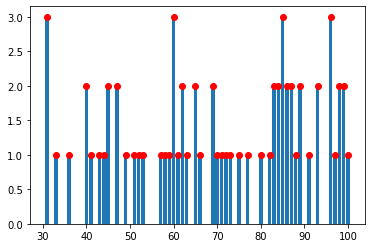

In [51]:
scores={31: 3, 33: 1, 36: 1, 40: 2, 41: 1, 43: 1, 44: 1, 45: 2, 47: 2, 49: 1, 51: 1, 52: 1, 53: 1, 57: 1, 58: 1, 59: 1, 60: 3, 61: 1, 62: 2, 63: 1, 65: 2, 66: 1, 69: 2, 70: 1, 71: 1, 72: 1, 73: 1, 75: 1, 77: 1, 80: 1, 82: 1, 83: 2, 84: 2, 85: 3, 86: 2, 87: 2, 88: 1, 89: 2, 91: 1, 93: 2, 96: 3, 97: 1, 98: 2, 99: 2, 100: 1}
print()
print()
x=list(scores.keys())
y=list(scores.values())
print(x)
print(y)
plt.plot(x,y,'ro')
plt.bar(x,y)
plt.show()